# 0. Load python packages needed for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Task 1: Data Exploration and Preliminary Analysis

In this section, we will clean and manipulate dataframe in order to write preliminary analaysis regarding below.

* Year(s) of data.
* Number of countries involved.
* Population covered by the dataset (percentage of world population).
* The type of quantiles used (quartiles, deciles, ventiles, percentiles, etc.).
* The $PPP unity and an explanation of why (not why not) it’s a good method to compare countries.
* A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index.
* The Lorenz curve for these countries.


## 1.1 Data Cleaning 

### 1.1.1  Income - average income per country

load world income distribution data in 2008, provided in Manager's note file

In [2]:
income_by_country=pd.read_csv('data-projet7.csv',sep=".")
income_by_country.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


Check null value

In [3]:
income_by_country.info()

# Null values in GDPPP columns
# also we should have multiple of 100 row number, in terms of quantile, but we only have 11599 rows, are we missing some data entry?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [4]:
income_by_country=income_by_country.groupby(['country','quantile']).mean().reset_index()

In [5]:
income_by_country

,country,quantile,year_survey,nb_quantiles,income,gdpppp
0,ALB,1,2008,100,728.89795,7297.0
1,ALB,2,2008,100,916.66235,7297.0
2,ALB,3,2008,100,1010.91600,7297.0
3,ALB,4,2008,100,1086.90780,7297.0
4,ALB,5,2008,100,1132.69970,7297.0
...,...,...,...,...,...,...
11594,ZAF,96,2008,100,24553.56800,9602.0
11595,ZAF,97,2008,100,28858.03100,9602.0
11596,ZAF,98,2008,100,35750.29000,9602.0
11597,ZAF,99,2008,100,46297.31600,9602.0


In [6]:
income_by_country.country.nunique()

116

* Get rid of data from other years than 2008 

In [7]:
# it seems majority of year is 2008, we will keep data from 2008

income_by_country.year_survey.value_counts()

2008    7599
2007    1500
2009    1200
2010     600
2006     500
2004     100
2011     100
Name: year_survey, dtype: int64

Check NA value on gdppp column

In [8]:
na_GDPPP = income_by_country[income_by_country.isna().any(axis=1)]
na_GDPPP.describe()
na_GDPPP

#XKX= Kosovo's gdppp is missing!


,country,quantile,year_survey,nb_quantiles,income,gdpppp
8999,PSE,1,2009,100,195.28990,NaN
9000,PSE,2,2009,100,264.36533,NaN
9001,PSE,3,2009,100,301.44672,NaN
9002,PSE,4,2009,100,329.83392,NaN
9003,PSE,5,2009,100,348.76495,NaN
...,...,...,...,...,...,...
11394,XKX,96,2008,100,5155.36470,NaN
11395,XKX,97,2008,100,5689.52930,NaN
11396,XKX,98,2008,100,6233.73930,NaN
11397,XKX,99,2008,100,7366.67700,NaN


In [9]:
na_GDPPP.country.unique()

array(['PSE', 'XKX'], dtype=object)

* Filled out GDPPP data on XKX based on infomation found on web
* https://www.macrotrends.net/countries/XKX/kosovo/gdp-per-capita#:~:text=Kosovo%20gdp%20per%20capita%20for,a%204.91%25%20increase%20from%202015.

In [10]:
kosovo_income=income_by_country.loc[(income_by_country['country']=='XKX')].fillna(3255)
pse_income=income_by_country.loc[(income_by_country['country']=='PSE')].fillna(3562)


In [11]:
non_na=income_by_country[~income_by_country.isna().any(axis=1)]
non_na.info()
kosovo_pse=pd.concat([pse_income, kosovo_income])
income_by_country=pd.concat([non_na, kosovo_pse])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11399 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11399 non-null  object 
 1   quantile      11399 non-null  int64  
 2   year_survey   11399 non-null  int64  
 3   nb_quantiles  11399 non-null  int64  
 4   income        11399 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 623.4+ KB


 Check quantile column where is missing data entry coming from?

In [12]:
income_by_country['quantile'].value_counts()

#missing quantile value is 41?

95    116
2     116
18    116
26    116
34    116
     ... 
53    116
61    116
69    116
8     116
41    115
Name: quantile, Length: 100, dtype: int64

Try to sort datafram by country and find mean of quantile, so that we could find a country where quantile data is missing


In [13]:
income_by_country.groupby("country").count()[income_by_country.groupby("country").count().values!=100]

##Country code LTU is missing quantile value!

,quantile,year_survey,nb_quantiles,income,gdpppp
country,,,,,
LTU,99,99,99,99,99
LTU,99,99,99,99,99
LTU,99,99,99,99,99
LTU,99,99,99,99,99
LTU,99,99,99,99,99


In [14]:
income_by_country[income_by_country["country"]=="LTU"]

,country,quantile,year_survey,nb_quantiles,income,gdpppp
6200,LTU,1,2008,100,566.3453,17571.0
6201,LTU,2,2008,100,1147.0587,17571.0
6202,LTU,3,2008,100,1490.8408,17571.0
6203,LTU,4,2008,100,1746.5715,17571.0
6204,LTU,5,2008,100,1842.9542,17571.0
...,...,...,...,...,...,...
6294,LTU,96,2008,100,14597.0360,17571.0
6295,LTU,97,2008,100,15659.0080,17571.0
6296,LTU,98,2008,100,17883.8770,17571.0
6297,LTU,99,2008,100,22551.1700,17571.0


Handle missing data on country code LTU

In [15]:
income_by_country.loc[(income_by_country['country'] == 'LTU') & ((income_by_country['quantile'] == 40)|(income_by_country['quantile'] == 42)) ]

new_row = {'country':'LTU', 'year_survey':2008, 'quantile':41, 'nb_quantiles':100,'income':4882.1406,'gdpppp':17571.0}
#append row to the dataframe
income_by_country_cleaned = income_by_country.append(new_row, ignore_index=True)
income_by_country_cleaned=income_by_country_cleaned.rename(columns={"country": "country_code"})
income_by_country_cleaned.head()

,country_code,quantile,year_survey,nb_quantiles,income,gdpppp
0,ALB,1,2008,100,728.89795,7297.0
1,ALB,2,2008,100,916.66235,7297.0
2,ALB,3,2008,100,1010.91600,7297.0
3,ALB,4,2008,100,1086.90780,7297.0
4,ALB,5,2008,100,1132.69970,7297.0


In [16]:
income_by_country_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  11600 non-null  object 
 1   quantile      11600 non-null  int64  
 2   year_survey   11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.9+ KB


In [17]:
income_by_country_cleaned['country_code'].nunique()

116

In [18]:
#getting only income numpy array based on individual country code
income_by_country_cleaned['income'].loc[income_by_country_cleaned['country_code'] == 'ALB'].to_numpy()

array([  728.89795,   916.66235,  1010.916  ,  1086.9078 ,  1132.6997 ,
        1171.1412 ,  1201.1324 ,  1240.8976 ,  1285.6914 ,  1325.2533 ,
        1351.3123 ,  1379.9443 ,  1416.7827 ,  1467.0759 ,  1503.6356 ,
        1535.6703 ,  1571.8933 ,  1604.8568 ,  1636.6593 ,  1669.9136 ,
        1709.7347 ,  1746.391  ,  1765.3282 ,  1789.8435 ,  1821.8538 ,
        1844.6742 ,  1863.2518 ,  1880.7145 ,  1903.7499 ,  1929.054  ,
        1950.4482 ,  1967.546  ,  1993.7744 ,  2026.2073 ,  2057.9592 ,
        2085.9587 ,  2115.247  ,  2141.773  ,  2170.2737 ,  2195.6135 ,
        2216.396  ,  2258.5613 ,  2291.3662 ,  2318.385  ,  2343.677  ,
        2367.7053 ,  2394.3325 ,  2414.1929 ,  2450.6875 ,  2493.837  ,
        2515.8542 ,  2545.9229 ,  2585.2053 ,  2624.496  ,  2653.148  ,
        2689.833  ,  2727.5537 ,  2760.3188 ,  2789.3022 ,  2820.4968 ,
        2853.7224 ,  2892.096  ,  2937.91   ,  2981.6497 ,  3007.7898 ,
        3061.0693 ,  3103.5266 ,  3146.2292 ,  3181.6255 ,  3230

In [19]:
country_code=income_by_country_cleaned['country_code'].unique()
country_code

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK',
       'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR',
       'GEO', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN',
       'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'PSE', 'XKX'],
      dtype=object)

Get mean income by country

In [20]:
pivot = income_by_country_cleaned.pivot_table(index=['country_code']).reset_index().rename(columns={'income': 'income_mean'})
pivot

,country_code,gdpppp,income_mean,nb_quantiles,quantile,year_survey
0,ALB,7297.0,2994.829902,100,50.5,2008
1,ARG,13220.0,5847.884654,100,50.5,2008
2,ARM,5611.0,1628.382785,100,50.5,2008
3,AUT,36193.0,16637.600204,100,50.5,2008
4,AZE,8101.0,2357.429023,100,50.5,2008
...,...,...,...,...,...,...
111,VEN,11756.0,3167.147724,100,50.5,2006
112,VNM,2578.0,1377.773966,100,50.5,2006
113,XKX,3255.0,2176.269035,100,50.5,2008
114,YEM,2224.0,1042.635870,100,50.5,2008


In [21]:
income_by_country_cleaned = income_by_country_cleaned.merge(pivot[['country_code','income_mean']], on='country_code', how='left')
income_by_country_cleaned

,country_code,quantile,year_survey,nb_quantiles,income,gdpppp,income_mean
0,ALB,1,2008,100,728.89795,7297.0,2994.829902
1,ALB,2,2008,100,916.66235,7297.0,2994.829902
2,ALB,3,2008,100,1010.91600,7297.0,2994.829902
3,ALB,4,2008,100,1086.90780,7297.0,2994.829902
4,ALB,5,2008,100,1132.69970,7297.0,2994.829902
...,...,...,...,...,...,...,...
11595,XKX,97,2008,100,5689.52930,3255.0,2176.269035
11596,XKX,98,2008,100,6233.73930,3255.0,2176.269035
11597,XKX,99,2008,100,7366.67700,3255.0,2176.269035
11598,XKX,100,2008,100,7609.57600,3255.0,2176.269035


### 1.1.2 Get GINI index info by Country

Calculte GINI index with functions based on income data that was provided previously

In [22]:
# we are going to use gini calculation code in resource here https://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/

def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [23]:
d={}
for country in country_code:
    d["{}".format(country)]=gini(income_by_country_cleaned[income_by_country_cleaned.country_code==country]["income"])*100

In [24]:
my_dict =d
country_gini = pd.DataFrame(list(my_dict.items()),columns = ['country_code','gini_mean'])
country_gini

,country_code,gini_mean
0,ALB,30.462429
1,ARG,44.990165
2,ARM,26.310763
3,AUT,27.827911
4,AZE,31.232118
...,...,...
111,VNM,37.748096
112,YEM,37.416124
113,ZAF,66.977850
114,PSE,35.506751


## 1.1.3 Get population data by Country

In [25]:
#download population data from https://data.worldbank.org/indicator/SP.POP.TOTL, get list of population per country as well as 
#country and country code

world_population=pd.read_csv('population_by_country.csv',skiprows=3)
world_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [26]:
world_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [27]:
world_population=world_population.reset_index()
world_population.head()
world_population.columns

Index(['index', 'Country Name', 'Country Code', 'Indicator Name',
       'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

* Rename columns in comprehensible format and take only columns needed

In [28]:
world_population=world_population.rename(columns={"Country Name": "country_name","Country Code":"country_code","2020": "2020_population"})
world_population=world_population[['country_name','country_code','2020_population']]
world_population

,country_name,country_code,2020_population
0,Aruba,ABW,106766.0
1,Africa Eastern and Southern,AFE,677243299.0
2,Afghanistan,AFG,38928341.0
3,Africa Western and Central,AFW,458803476.0
4,Angola,AGO,32866268.0
...,...,...,...
261,Kosovo,XKX,1775378.0
262,"Yemen, Rep.",YEM,29825968.0
263,South Africa,ZAF,59308690.0
264,Zambia,ZMB,18383956.0


* Check NA value

In [29]:
is_NaN_pop = world_population.isnull()
row_has_NaN_pop= is_NaN_pop.any(axis=1)
rows_with_NaN = world_population[row_has_NaN_pop]
rows_with_NaN

## country_name Not classified - could be dropped
## Eritrea, we will add most recent population found on google https://www.worldometers.info/world-population/eritrea-population/


,country_name,country_code,2020_population
69,Eritrea,ERI,NaN
110,Not classified,INX,NaN


In [30]:
world_population=world_population.fillna(3214000.0)
world_population=world_population[world_population["country_name"] != 'Not classified']

In [31]:
world_population=world_population[['country_code','2020_population']]

### 1.1.4 Elasticity Data

In [32]:
#I apply directly transformations to make it usable...
#I keep only the country and the IGEincome(=elasticity)
#there are still a lot of identical lines for each country so I groupby then mean()
#and reset_index for ease of use

elasticity=pd.read_csv("GDIMMay2018.csv")[["wbcode","IGEincome"]].groupby("wbcode").mean().reset_index()
elasticity=elasticity.rename(columns={"wbcode":"country_code"})
elasticity

,country_code,IGEincome
0,AFG,NaN
1,AGO,NaN
2,ALB,0.815874
3,ARG,NaN
4,ARM,NaN
...,...,...
145,WBG,NaN
146,YEM,NaN
147,ZAF,0.677000
148,ZAR,0.707703


* Check NA value

In [33]:
elasticity.isna().sum()

#there are 150countries that are represented, how many percentage of population does it cover? also there are some null value in IGEincome, is it significant?


country_code     0
IGEincome       75
dtype: int64

In [34]:
population_elasticity=pd.merge(elasticity,world_population,how="left")
population_elasticity

,country_code,IGEincome,2020_population
0,AFG,NaN,38928341.0
1,AGO,NaN,32866268.0
2,ALB,0.815874,2837743.0
3,ARG,NaN,45376763.0
4,ARM,NaN,2963234.0
...,...,...,...
145,WBG,NaN,NaN
146,YEM,NaN,29825968.0
147,ZAF,0.677000,59308690.0
148,ZAR,0.707703,NaN


In [35]:
population_elasticity_non_na=population_elasticity[~population_elasticity["IGEincome"].isna() & ~population_elasticity["2020_population"].isna()]

In [36]:
population_elasticity[~population_elasticity["IGEincome"].isna()].sum()["2020_population"]/7794798739

# we are covering about 74% of population with this data


0.7423440900466847

In [37]:
mean_elasticity=population_elasticity[~population_elasticity["IGEincome"].isna()].mean()["IGEincome"]
mean_elasticity

# we will use this to fill in NA values in IGEincome column

0.515403952

## 1.1.5 Assemble Dataframes (from 1.1.1,1.1.2,1.1.3,1.1.4) 

* Join individual datafram so that we could have one integreated dataframe for future analysis

In [38]:
country_gini.head()

,country_code,gini_mean
0,ALB,30.462429
1,ARG,44.990165
2,ARM,26.310763
3,AUT,27.827911
4,AZE,31.232118


In [39]:
income_by_country_cleaned.head()

,country_code,quantile,year_survey,nb_quantiles,income,gdpppp,income_mean
0,ALB,1,2008,100,728.89795,7297.0,2994.829902
1,ALB,2,2008,100,916.66235,7297.0,2994.829902
2,ALB,3,2008,100,1010.91600,7297.0,2994.829902
3,ALB,4,2008,100,1086.90780,7297.0,2994.829902
4,ALB,5,2008,100,1132.69970,7297.0,2994.829902


In [40]:
population_elasticity.head()

,country_code,IGEincome,2020_population
0,AFG,NaN,38928341.0
1,AGO,NaN,32866268.0
2,ALB,0.815874,2837743.0
3,ARG,NaN,45376763.0
4,ARM,NaN,2963234.0


We are going to use reduc function to join three dataframes

In [41]:
income_elasticity=pd.merge(population_elasticity,income_by_country_cleaned,how="inner").fillna(mean_elasticity)
income_elasticity

,country_code,IGEincome,2020_population,quantile,year_survey,nb_quantiles,income,gdpppp,income_mean
0,ALB,0.815874,2837743.0,1,2008,100,728.89795,7297.0,2994.829902
1,ALB,0.815874,2837743.0,2,2008,100,916.66235,7297.0,2994.829902
2,ALB,0.815874,2837743.0,3,2008,100,1010.91600,7297.0,2994.829902
3,ALB,0.815874,2837743.0,4,2008,100,1086.90780,7297.0,2994.829902
4,ALB,0.815874,2837743.0,5,2008,100,1132.69970,7297.0,2994.829902
...,...,...,...,...,...,...,...,...,...
10995,ZAF,0.677000,59308690.0,96,2008,100,24553.56800,9602.0,5617.904880
10996,ZAF,0.677000,59308690.0,97,2008,100,28858.03100,9602.0,5617.904880
10997,ZAF,0.677000,59308690.0,98,2008,100,35750.29000,9602.0,5617.904880
10998,ZAF,0.677000,59308690.0,99,2008,100,46297.31600,9602.0,5617.904880


In [42]:
df_full=pd.merge(income_elasticity,country_gini,how='inner')

In [43]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [44]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     11000 non-null  object 
 1   IGEincome        11000 non-null  float64
 2   2020_population  11000 non-null  float64
 3   quantile         11000 non-null  int64  
 4   year_survey      11000 non-null  int64  
 5   nb_quantiles     11000 non-null  int64  
 6   income           11000 non-null  float64
 7   gdpppp           11000 non-null  float64
 8   income_mean      11000 non-null  float64
 9   gini_mean        11000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 945.3+ KB


In [45]:
df_full['country_code'].nunique()

110

In [46]:
df_full['year_survey'].nunique()

6

In [47]:
df_full.groupby('country_code')['2020_population'].mean().sum()


6884195334.515404

* Check how much of population is covered

In [48]:
6884195334/7800000000

0.8825891453846154

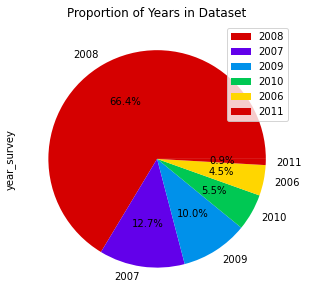

In [49]:
palette = ['#d50000', '#6200ea', '#0091ea', '#00c853', '#ffd600']
plt.figure(figsize=(5,5))
df_full['year_survey'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%', colors=palette)
plt.title('Proportion of Years in Dataset')
plt.show()

# 1.2 Preliminary Analysis


* Year(s) of data. 
* Number of countries involved.
* Population covered by the dataset (percentage of world population).
* The type of quantiles used (quartiles, deciles, ventiles, percentiles, etc.).
* The $PPP unity and an explanation of why (not why not) it’s a good method to compare countries.


-> the years studied vary between 2004 and 2011, with a large majority in 2008.
-> Number of countries involded are 110 countries.
-> population covered by data is 6884195334, which is 88% of world population.


The data of the world income distribution presents for each country the quantiles of the income distribution of their respective population.

What kind of quantiles are we talking about (quartiles, deciles, etc.)?

-> they are percentiles

PPP unity

-> $PPP means that amounts are brought to a common scale by dividing the purchasing power of one currency by another. It is the theoretical exchange rate at which you can buy the same amount of goods and services with another currency.It will be good choice to compare purchasing power between different currency. 

-> Graph showing income distribution of countries and Lorez Cuve will be visualized below

## 1.3 Data Visualizations

* Find a country code with highest gini figure

In [50]:
df_full[df_full['gini_mean'] == df_full['gini_mean'].max()]

,country_code,IGEincome,2020_population,quantile,year_survey,nb_quantiles,income,gdpppp,income_mean,gini_mean
10900,ZAF,0.677,59308690.0,1,2008,100,60.490383,9602.0,5617.90488,66.97785
10901,ZAF,0.677,59308690.0,2,2008,100,138.341550,9602.0,5617.90488,66.97785
10902,ZAF,0.677,59308690.0,3,2008,100,192.294500,9602.0,5617.90488,66.97785
10903,ZAF,0.677,59308690.0,4,2008,100,236.994000,9602.0,5617.90488,66.97785
10904,ZAF,0.677,59308690.0,5,2008,100,279.367580,9602.0,5617.90488,66.97785
10905,ZAF,0.677,59308690.0,6,2008,100,322.992650,9602.0,5617.90488,66.97785
10906,ZAF,0.677,59308690.0,7,2008,100,358.578300,9602.0,5617.90488,66.97785
10907,ZAF,0.677,59308690.0,8,2008,100,391.797600,9602.0,5617.90488,66.97785
10908,ZAF,0.677,59308690.0,9,2008,100,423.934450,9602.0,5617.90488,66.97785
10909,ZAF,0.677,59308690.0,10,2008,100,455.441560,9602.0,5617.90488,66.97785


* Find a country code with lowest gini figure

In [51]:
df_full[df_full['gini_mean'] == df_full['gini_mean'].min()]

,country_code,IGEincome,2020_population,quantile,year_survey,nb_quantiles,income,gdpppp,income_mean,gini_mean
9400,SVN,0.311212,2100126.0,1,2008,100,2814.9530,27197.0,12106.007475,23.073125
9401,SVN,0.311212,2100126.0,2,2008,100,3924.2173,27197.0,12106.007475,23.073125
9402,SVN,0.311212,2100126.0,3,2008,100,4551.5674,27197.0,12106.007475,23.073125
9403,SVN,0.311212,2100126.0,4,2008,100,4987.3280,27197.0,12106.007475,23.073125
9404,SVN,0.311212,2100126.0,5,2008,100,5399.6714,27197.0,12106.007475,23.073125
9405,SVN,0.311212,2100126.0,6,2008,100,5699.3975,27197.0,12106.007475,23.073125
9406,SVN,0.311212,2100126.0,7,2008,100,5950.1035,27197.0,12106.007475,23.073125
9407,SVN,0.311212,2100126.0,8,2008,100,6157.1777,27197.0,12106.007475,23.073125
9408,SVN,0.311212,2100126.0,9,2008,100,6334.0234,27197.0,12106.007475,23.073125
9409,SVN,0.311212,2100126.0,10,2008,100,6535.8145,27197.0,12106.007475,23.073125


* The following graph represents the average income (y-axis, on a logarithmic scale) of each income class (x-axis).

=> Country Selected are : ZAF(South Africa), BEL(Belgium), KOR(KOREA), USA(USA), SVN(Slovenia)

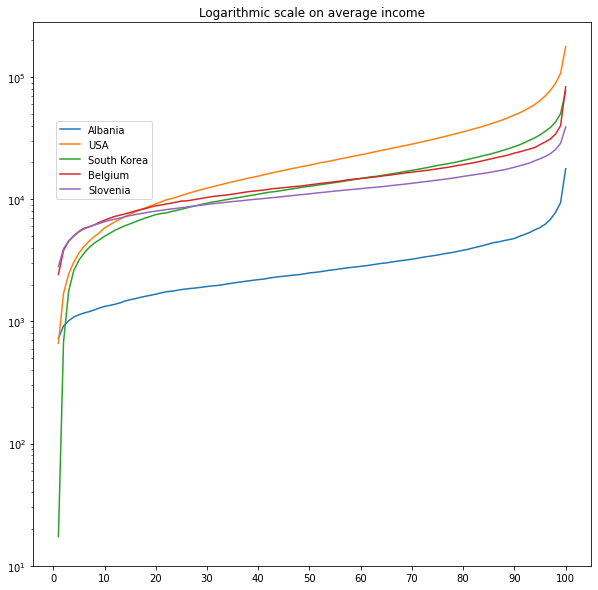

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df_full[df_full["country_code"]=="ALB"].groupby("quantile").sum()["income"])
plt.plot(df_full[df_full["country_code"]=="USA"].groupby("quantile").sum()["income"])
plt.plot(df_full[df_full["country_code"]=="KOR"].groupby("quantile").sum()["income"])
plt.plot(df_full[df_full["country_code"]=="BEL"].groupby("quantile").sum()["income"])
plt.plot(df_full[df_full["country_code"]=="SVN"].groupby("quantile").sum()["income"])

ax.set_yscale('log')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_yticks([10,100,1000,10000,100000])
fig.legend(("Albania","USA","South Korea","Belgium","Slovenia"),
            loc='upper left', bbox_to_anchor=(0.15,0.75))
plt.title('Logarithmic scale on average income')
plt.show()

In [53]:
def lorenz_curve(X):
    #take out country
    country=X.index.unique().values[0]
    #take value and calculate lorez curve
    X_lorenz = X.values.cumsum() / X.values.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    fig, ax = plt.subplots(figsize=[7,7])
    #visualize it in percentage
    ax.scatter((np.arange(X_lorenz.size)/(X_lorenz.size-1)*100), X_lorenz*100, 
               color='blue', s=10,label=country)
    #equality line
    ax.plot([0,100], [0,100], color='k')
    #labelling axes
    plt.xlabel("% income class")
    plt.ylabel("% riches")
    plt.legend()
    plt.savefig("{}".format(country)+"_lorenz.png")
    plt.show()

In [54]:
lorenz_svn=df_full[df_full.country_code=="SVN"][["income","country_code"]].set_index("country_code")
lorenz_usa=df_full[df_full.country_code=="USA"][["income","country_code"]].set_index("country_code")
lorenz_kor=df_full[df_full.country_code=="KOR"][["income","country_code"]].set_index("country_code")
lorenz_bel=df_full[df_full.country_code=="BEL"][["income","country_code"]].set_index("country_code")
lorenz_zaf=df_full[df_full.country_code=="ZAF"][["income","country_code"]].set_index("country_code")

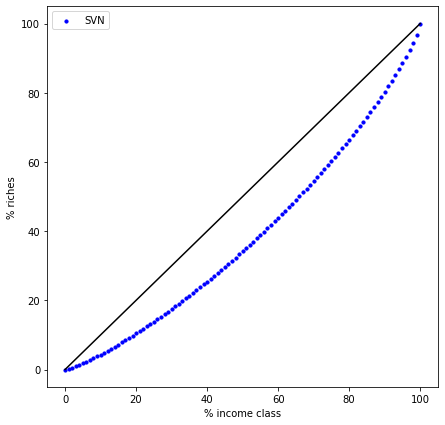

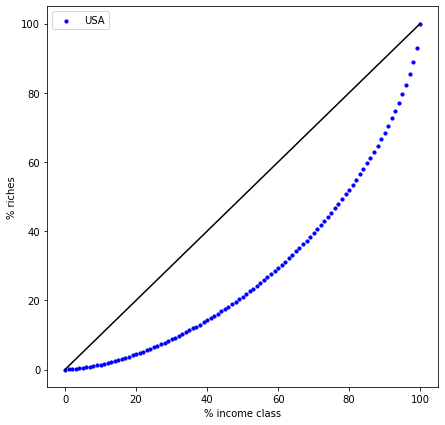

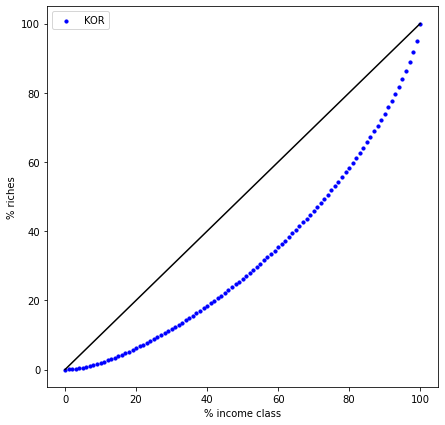

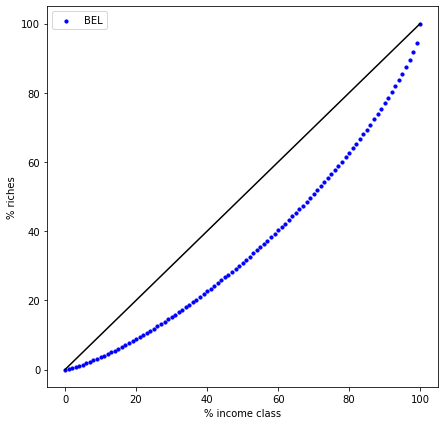

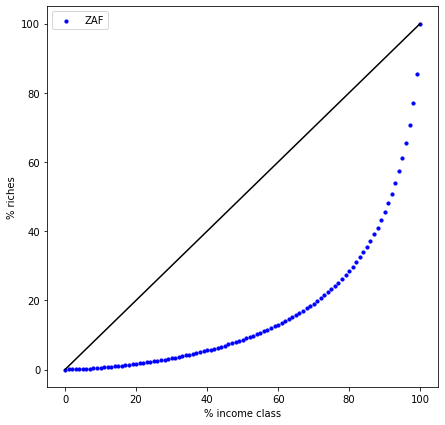

In [55]:
lorenz_curve(lorenz_svn)
lorenz_curve(lorenz_usa)
lorenz_curve(lorenz_kor)
lorenz_curve(lorenz_bel)
lorenz_curve(lorenz_zaf)

Text(0.5, 1.0, 'Overview of Lorenz Surve for Selected Countries')

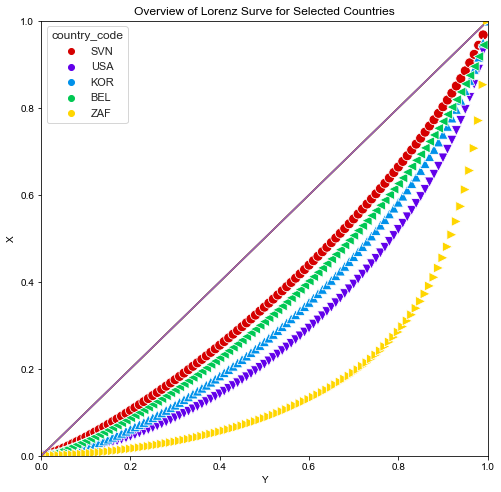

In [56]:
palette = ['#d50000', '#6200ea', '#0091ea', '#00c853', '#ffd600']
country_panel = ['SVN', 'USA', 'KOR', 'BEL', 'ZAF']
panel = df_full[df_full['country_code'].isin(country_panel)]
panel

def lorenz(country, color, marker):

    variable = df_full[df_full['country_code']==country]['income']    
    X = np.sort(variable.values)
 
    a = np.arange(0,1,.01) # Diagonale
    x = a
    y = a  
    sns.lineplot(x=x,y=y)
    
    sns.set(rc={'figure.figsize':(8,8)})
    sns.set_style('whitegrid')
    plt.xlim([0,1])
    plt.ylim([0,1])

    X_lorenz = X.cumsum() / X.sum() # Curve of Lorenz
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    lorenz['country_code'] = country
    sns.scatterplot(data=lorenz, x='Y', y='X', hue='country_code', 
                    marker=marker, palette=[color], s=100)

plt.figure(figsize=(8, 8))
markers = ['o', 'v', '^', '<', '>']

for i in range(0, len(country_panel)):
    lorenz(country_panel[i], palette[i], markers[i])
    
plt.title('Overview of Lorenz Surve for Selected Countries')


* Visualization of GINI for 5 countries

In [57]:
gini_five_country=country_gini.loc[country_gini['country_code'].isin(['SVN','USA','KOR','BEL','ZAF'])]
gini_five_country

,country_code,gini_mean
5,BEL,28.459548
58,KOR,35.161416
96,SVN,23.073125
109,USA,43.179916
113,ZAF,66.977850


No handles with labels found to put in legend.


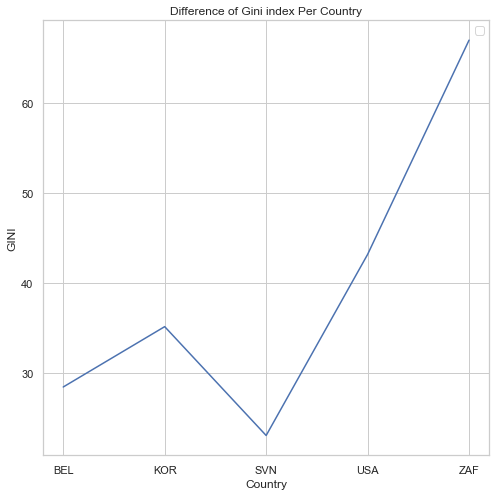

In [58]:
plt.plot(gini_five_country['country_code'], gini_five_country['gini_mean'])

plt.xlabel('Country')
plt.ylabel('GINI')
plt.legend()
plt.title('Difference of Gini index Per Country')
plt.show()

# Task2: Simulating children's income based on parent's income

* We need following information, so we will work on build up parents income class

*	\(c_{i,parent}\)---> We will do it in following codes
*	  \(m_{j} \) : the average income in country \(j\) ---> ALREADY HAVE it from TASK1
*	 \(G_{j}\) : Gini index of country \(j\) ---> ---> ALREADY HAVE it from TASK1


## 2.1 Create functions

In [59]:
# import the packages needed for generating dataset

import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [60]:
def generate_incomes(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)



In [61]:
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size)
-0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])


In [62]:
def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample



In [63]:
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles

    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib



In [64]:
def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat)



In [65]:
# one function that integrate all functions

def condi_pays(n, nb_quantiles, pj_pays):
    y_child,y_parents = generate_incomes(n,pj = pj_pays)
    sample = compute_quantiles(y_child,y_parents,nb_quantiles)
    cd = conditional_distributions(sample,nb_quantiles)
    return cd




## 2.2 Clone the dataframe and Generate Dataset

In [66]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     11000 non-null  object 
 1   IGEincome        11000 non-null  float64
 2   2020_population  11000 non-null  float64
 3   quantile         11000 non-null  int64  
 4   year_survey      11000 non-null  int64  
 5   nb_quantiles     11000 non-null  int64  
 6   income           11000 non-null  float64
 7   gdpppp           11000 non-null  float64
 8   income_mean      11000 non-null  float64
 9   gini_mean        11000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 945.3+ KB


In [67]:
df_clones=df_full.append([df_full]*499)


In [68]:
df_clones=df_clones.sort_values(by=["country_code","quantile"]).reset_index(drop=True)

df_clones.head()

,country_code,IGEincome,2020_population,quantile,year_survey,nb_quantiles,income,gdpppp,income_mean,gini_mean
0,ALB,0.815874,2837743.0,1,2008,100,728.89795,7297.0,2994.829902,30.462429
1,ALB,0.815874,2837743.0,1,2008,100,728.89795,7297.0,2994.829902,30.462429
2,ALB,0.815874,2837743.0,1,2008,100,728.89795,7297.0,2994.829902,30.462429
3,ALB,0.815874,2837743.0,1,2008,100,728.89795,7297.0,2994.829902,30.462429
4,ALB,0.815874,2837743.0,1,2008,100,728.89795,7297.0,2994.829902,30.462429


In [69]:
df_clones.groupby(["country_code"]).mean()['IGEincome'].count()

110

In [70]:
elements = np.arange(100)+1 #create list from 1 to 100
nb_quantiles=100
n=1000*nb_quantiles

quantiles_associes=[]
for elasticity_pays in df_clones.groupby(["country_code"]).mean()['IGEincome']:#for each country 
    probabilites=condi_pays(n,nb_quantiles,elasticity_pays)
    #calculation distribution of all quantiles
    for z in range(100):#for each child's quantile:
        probabilites_quantile_z=probabilites[z]
        #take out Nth quantile
        quantile_associe=np.random.choice(elements, 500, p=probabilites_quantile_z)
        #create new array based on distribution of quantile
        quantiles_associes+=[quantile_associe]
        #create list of arrays
quantiles_associes_merged=[j for i in quantiles_associes for j in i]
#make integrated array,to combine with rest of data
data_anova=pd.concat([df_clones,pd.Series(quantiles_associes_merged)],axis=1)
data_anova=data_anova.rename(columns={0:"parent_income_class"}).drop(columns=["year_survey","2020_population"], axis=1)

* Visualization of Children and Parent's income class - to verify if data is corrected generated

In [71]:
zaf_sample= data_anova[data_anova['country_code'] == 'ZAF']
zaf_sample_quantile_1= zaf_sample[zaf_sample['quantile'] == 1]
zaf_sample_quantile_50= zaf_sample[zaf_sample['quantile'] == 50]
zaf_sample_quantile_100= zaf_sample[zaf_sample['quantile'] == 100]
zaf_sample_quantile_1

,country_code,IGEincome,quantile,nb_quantiles,income,gdpppp,income_mean,gini_mean,parent_income_class
5450000,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,13
5450001,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,5
5450002,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,3
5450003,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,11
5450004,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,35
5450005,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,18
5450006,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,4
5450007,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,1
5450008,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,3
5450009,ZAF,0.677,1,100,60.490383,9602.0,5617.90488,66.97785,8


<AxesSubplot:xlabel='quantile', ylabel='count'>

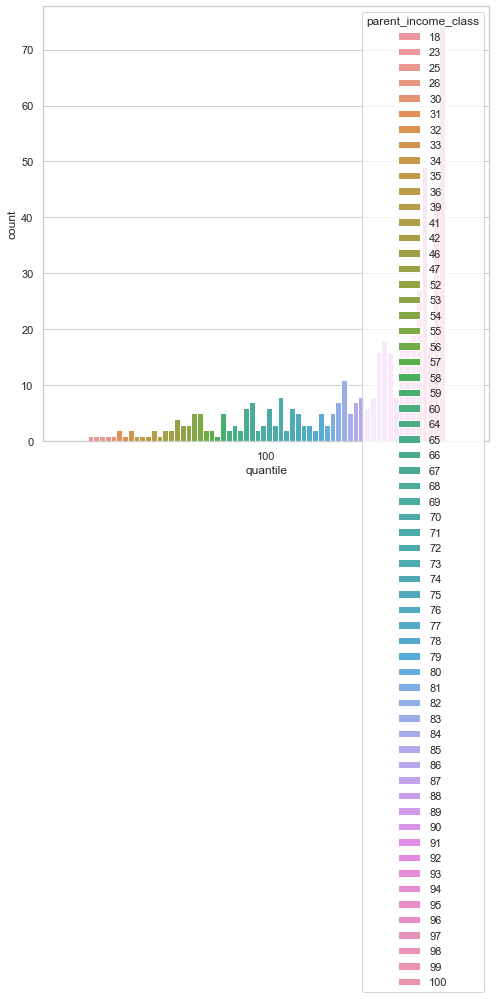

In [72]:
import seaborn as sns

sns.countplot(x="quantile", hue="parent_income_class", data=zaf_sample_quantile_100)


<AxesSubplot:xlabel='quantile', ylabel='count'>

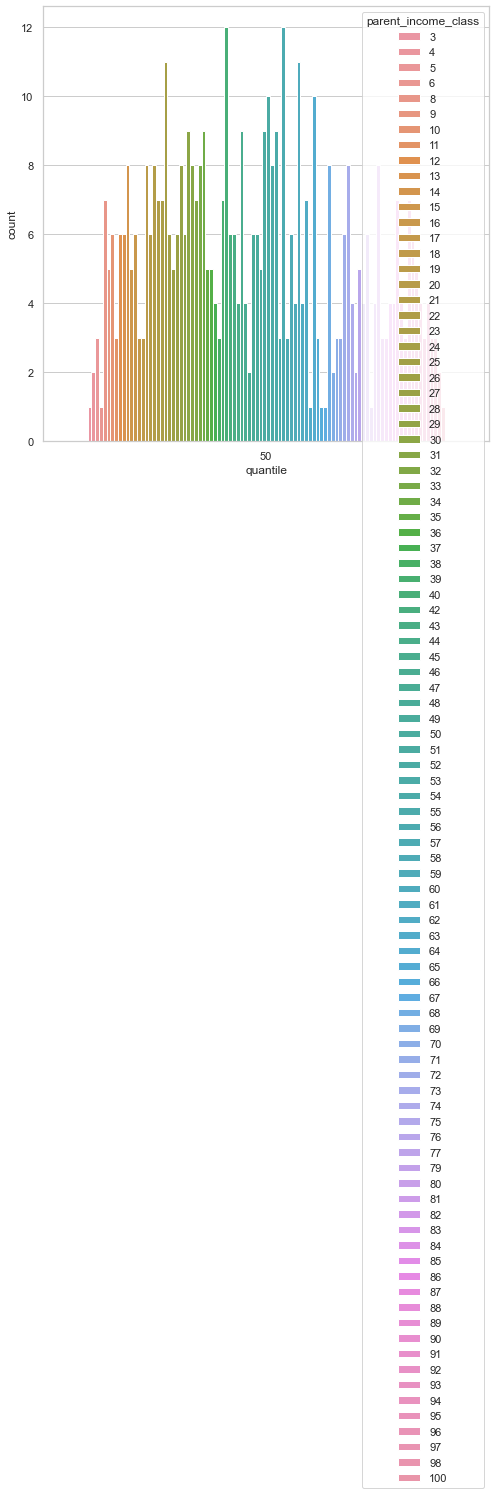

In [73]:
sns.countplot(x="quantile", hue="parent_income_class", data=zaf_sample_quantile_50)

<AxesSubplot:xlabel='quantile', ylabel='count'>

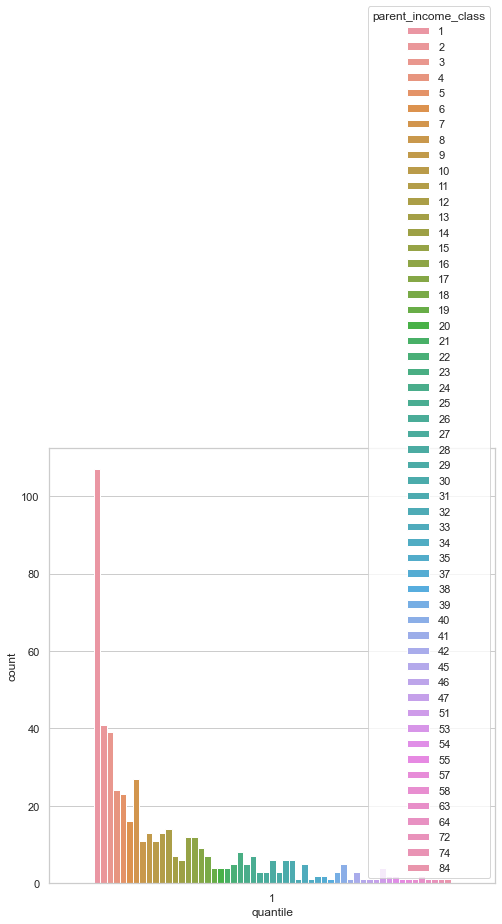

In [74]:
sns.countplot(x="quantile", hue="parent_income_class", data=zaf_sample_quantile_1)

In [75]:
svn_sample= data_anova[data_anova['country_code'] == 'SVN']
svn_sample_quantile_1= svn_sample[svn_sample['quantile'] == 1]
svn_sample_quantile_50= svn_sample[svn_sample['quantile'] == 50]
svn_sample_quantile_100= svn_sample[svn_sample['quantile'] == 100]


<AxesSubplot:xlabel='quantile', ylabel='count'>

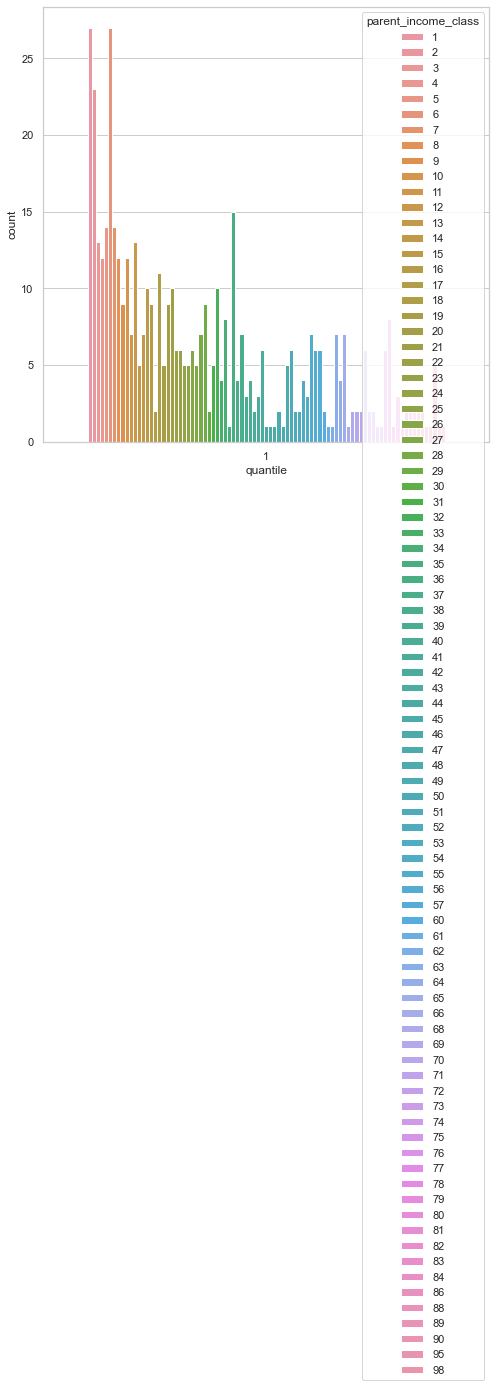

In [76]:
sns.countplot(x="quantile", hue="parent_income_class", data=svn_sample_quantile_1)

<AxesSubplot:xlabel='quantile', ylabel='count'>

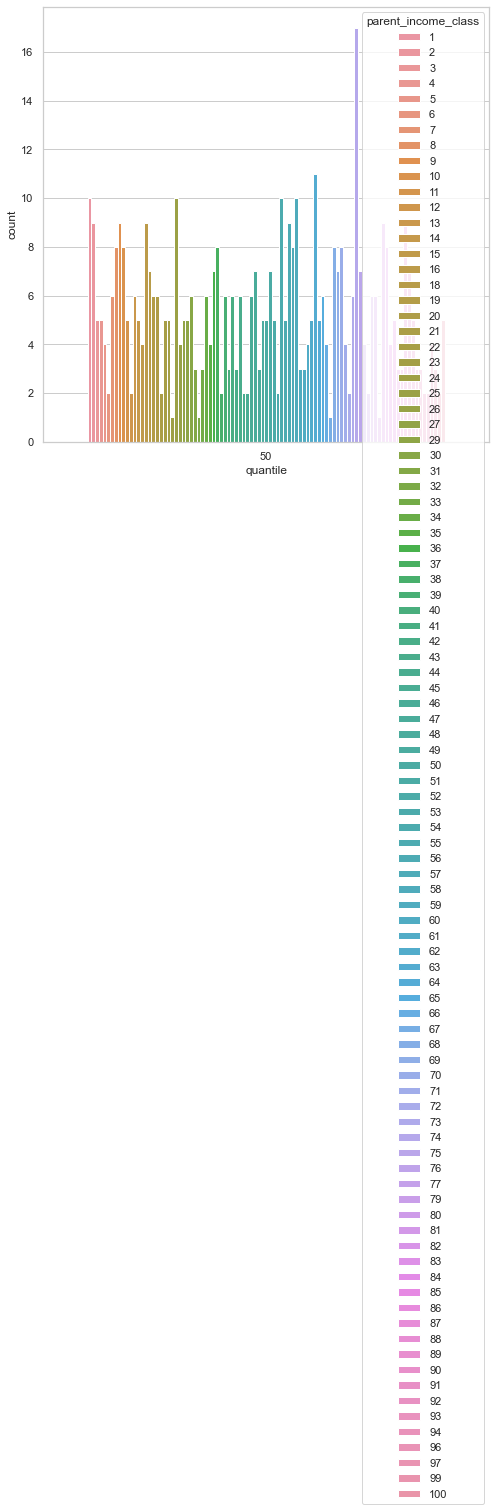

In [77]:
sns.countplot(x="quantile", hue="parent_income_class", data=svn_sample_quantile_50)

<AxesSubplot:xlabel='quantile', ylabel='count'>

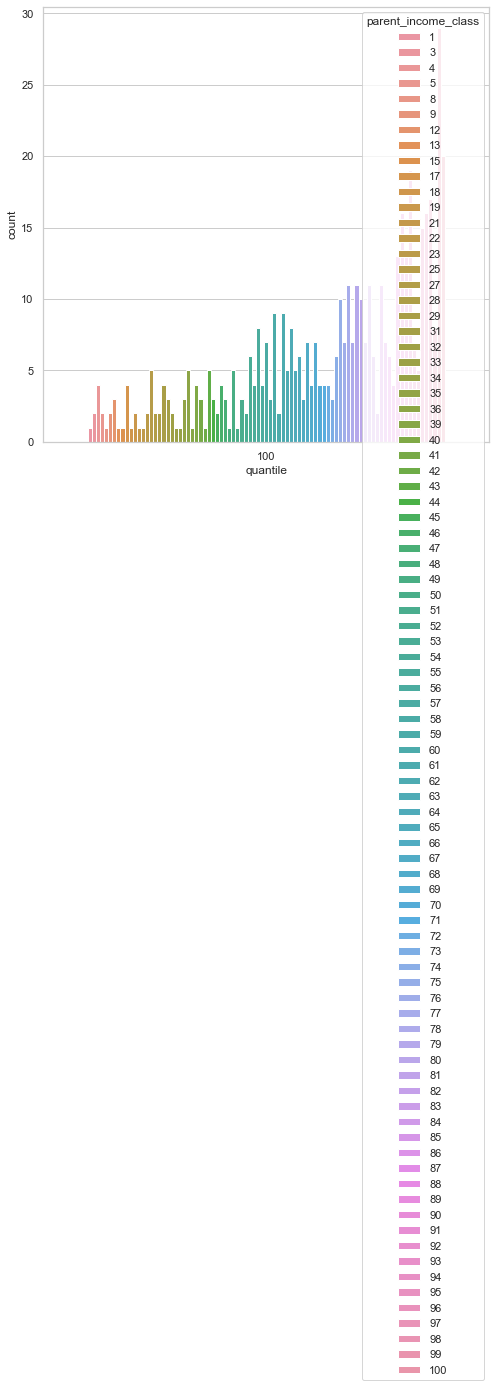

In [78]:
sns.countplot(x="quantile", hue="parent_income_class", data=svn_sample_quantile_100)

# Task3: Task ANOVA and Linear Regression Model

## 3.1Perform ANOVA

Make data more readible format to perfom ANOVA

In [79]:
data_anova.corr()

# here we could see correlation between individual child' income(=income) vs elatiscity(igeincome), gdp,gini, parent income class

,IGEincome,quantile,nb_quantiles,income,gdpppp,income_mean,gini_mean,parent_income_class
IGEincome,1.000000e+00,-1.195477e-19,NaN,-0.335929,-1.590349e-02,-4.800827e-01,4.998521e-01,-0.000454
quantile,-1.195477e-19,1.000000e+00,NaN,0.393011,1.764395e-19,-2.961537e-18,-1.018451e-18,0.428548
nb_quantiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,-3.359287e-01,3.930109e-01,NaN,1.000000,-2.054375e-02,6.997309e-01,-2.589776e-01,0.163100
gdpppp,-1.590349e-02,1.764395e-19,NaN,-0.020544,1.000000e+00,-2.935950e-02,3.742656e-02,0.000919
income_mean,-4.800827e-01,-2.961537e-18,NaN,0.699731,-2.935950e-02,1.000000e+00,-3.701102e-01,0.001099
gini_mean,4.998521e-01,-1.018451e-18,NaN,-0.258978,3.742656e-02,-3.701102e-01,1.000000e+00,-0.000772
parent_income_class,-4.535954e-04,4.285482e-01,NaN,0.163100,9.194874e-04,1.099199e-03,-7.724146e-04,1.000000


In [80]:
data_anova.head()

,country_code,IGEincome,quantile,nb_quantiles,income,gdpppp,income_mean,gini_mean,parent_income_class
0,ALB,0.815874,1,100,728.89795,7297.0,2994.829902,30.462429,7
1,ALB,0.815874,1,100,728.89795,7297.0,2994.829902,30.462429,40
2,ALB,0.815874,1,100,728.89795,7297.0,2994.829902,30.462429,6
3,ALB,0.815874,1,100,728.89795,7297.0,2994.829902,30.462429,5
4,ALB,0.815874,1,100,728.89795,7297.0,2994.829902,30.462429,7


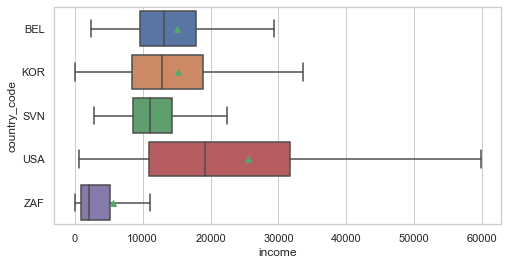

In [81]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(
    data=data_anova[data_anova['country_code'].isin(['SVN','USA','KOR','BEL','ZAF'])], 
    x='income', y='country_code',
    showfliers=False, showmeans=True)
plt.show()


In [82]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('income~country_code', data=data_anova).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 4.841e+04
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:49:56   Log-Likelihood:            -5.6383e+07
No. Observations:             5500000   AIC:                         1.128e+08
Df Residuals:                 5499890   BIC:                         1.128e+08
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2994.8299     30.651     97.708      0.000    2934.756    3054.904
country_code[T.ARG]  2853.0548     43.347     65.820      0.000    2768.097    2938.013
country_code[T.ARM] -1366.4471     43.347    -31.524      0.000   -1451.405   -1281.489
country_code[T.AUT]  1.364e+04     43.347    314.737      0.000    1.36e+04    1.37e+04
country_code[T.AZE]  -637.4009     43.347    -14.705      0.000    -722.359    -552.443
country_code[T.BEL]  1.203e+04     43.347    277.525      0.000    1.19e+04    1.21e+04
country_code[T.BFA] -2076.8772     43.347    -47.913      0.000   -2161.835   -1991.919
country_code[T.BGD] -1996.1375     43.347    -46.051      0.000   -2081.095   -1911.180
country_code[T.BGR]  1990.1487     43.347     45.912      0.000    1905.191    2075.106
country_code[T.BIH]  3339.8574     43.347     77.050      0.000    3254.900    3424.815
country_code[T.BLR]   926.3336     43.347     21.370      0.000     841.376    1011.291
country_code[T.BOL]    21.4339     43.347      0.494      0.621     -63.524     106.392
country_code[T.BRA]  1812.6547     43.347     41.818      0.000    1727.697    1897.612
country_code[T.BTN] -1478.9008     43.347    -34.118      0.000   -1563.859   -1393.943
country_code[T.CAF] -2183.5300     43.347    -50.374      0.000   -2268.488   -2098.572
country_code[T.CAN]  2.074e+04     43.347    478.580      0.000    2.07e+04    2.08e+04
country_code[T.CHL]  4056.7801     43.347     93.589      0.000    3971.822    4141.738
country_code[T.CHN]  -472.0712     43.347    -10.891      0.000    -557.029    -387.113
country_code[T.CIV] -2594.9947     43.347    -59.866      0.000   -2679.952   -2510.037
country_code[T.CMR] -1200.3359     43.347    -27.692      0.000   -1285.294   -1115.378
country_code[T.COL]   552.1754     43.347     12.739      0.000     467.218     637.133
country_code[T.CRI]  2585.5567     43.347     59.648      0.000    2500.599    2670.514
country_code[T.CYP]  1.435e+04     43.347    331.065      0.000    1.43e+04    1.44e+04
country_code[T.CZE]  5240.4635     43.347    120.897      0.000    5155.506    5325.421
country_code[T.DEU]  1.507e+04     43.347    347.591      0.000     1.5e+04    1.52e+04
country_code[T.DNK]  1.405e+04     43.347    324.093      0.000     1.4e+04    1.41e+04
country_code[T.DOM]   563.5722     43.347     13.002      0.000     478.614     648.530
country_code[T.ECU]   388.9111     43.347      8.972      0.000     303.953     473.869
country_code[T.EGY] -1025.2525     43.347    -23.652      0.000   -1110.210    -940.295
country_code[T.ESP]  1.012e+04     43.347    233.517      0.000       1e+04    1.02e+04
country_code[T.EST]  4707.2327     43.347    108.595      0.000    4622.275    4792.190
country_code[T.FIN]  1.331e+04     43.347    307.094      0.000    1.32e+04    1.34e+04
cou

In [83]:
aov_table = sm.stats.anova_lm(results)
print(aov_table)

## p-value is lower than 0.05 we could say that there are significant difference among parent's income class.



                     df        sum_sq       mean_sq             F  PR(>F)
country_code      109.0  2.478422e+14  2.273781e+12  48405.942733     0.0
Residual      5499890.0  2.583474e+14  4.697319e+07           NaN     NaN


p-value : 0.0 
stat (F) : 48405.942733
H1: one or more of the means of the samples are unequal.
    

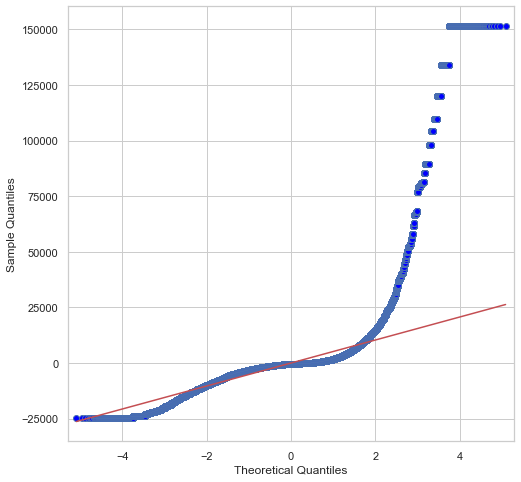

In [84]:
sm.qqplot(results.resid, line='r');

## 3.2 Perform Regression

In [85]:
data_anova['income_ln'] = np.log(data_anova['income'])
data_anova['income_mean_ln'] = np.log(data_anova['income_mean'])
data_anova['gdpppp_ln'] = np.log(data_anova['gdpppp'])

* y= child's income x=income_mean, gini_mean

In [86]:
M1 = 'income ~ income_mean + gini_mean'
result1 = smf.ols(M1, data = data_anova).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 2.638e+06
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:51:45   Log-Likelihood:            -5.6383e+07
No. Observations:             5500000   AIC:                         1.128e+08
Df Residuals:                 5499997   BIC:                         1.128e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.766e-09     14.767  -1.87e-10      

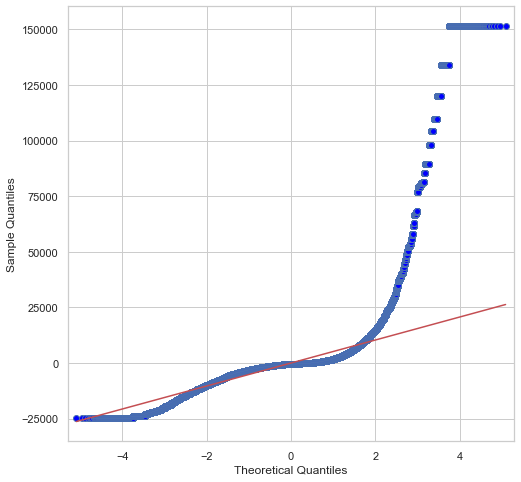

In [87]:
sm.qqplot(result1.resid, line='r');

In [88]:
from statsmodels.formula.api import ols
M1 = ols(M1,data=data_anova).fit()
anova = sm.stats.anova_lm(M1, typ=1)
print(anova)



denominator = anova['sum_sq'].sum()
anova['proportion'] = anova['sum_sq'] / denominator

anova['proportion'] 

                    df        sum_sq       mean_sq             F  PR(>F)
income_mean        1.0  2.478422e+14  2.478422e+14  5.276350e+06     0.0
gini_mean          1.0  9.644804e-13  9.644804e-13  2.053297e-20     1.0
Residual     5499997.0  2.583474e+14  4.697227e+07           NaN     NaN


income_mean    4.896233e-01
gini_mean      1.905374e-27
Residual       5.103767e-01
Name: proportion, dtype: float64

Based on above variance proportion, 
It turns out mean income exmplain almost half of variance with 4.89

* y= child income x=income_mean,parent_income_class, gini_mean

In [89]:
M2 = 'income ~ income_mean + gini_mean+parent_income_class'
result2 = smf.ols(M2, data = data_anova).fit()
print(result2.summary())




                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 1.954e+06
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:51:58   Log-Likelihood:            -5.6237e+07
No. Observations:             5500000   AIC:                         1.125e+08
Df Residuals:                 5499996   BIC:                         1.125e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2726.5764    

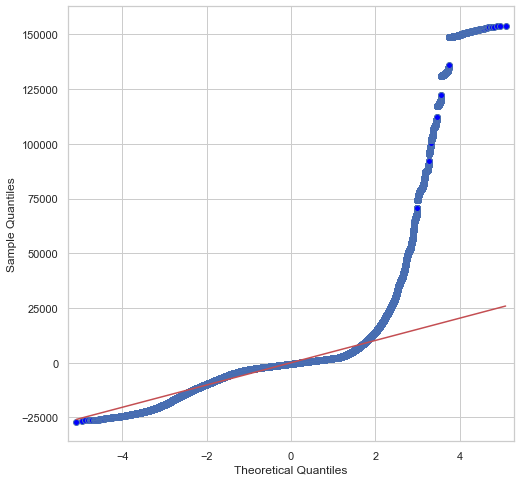

In [90]:
sm.qqplot(result2.resid, line='r');

In [91]:
from statsmodels.formula.api import ols
M2 = ols(M2,data=data_anova).fit()
anova = sm.stats.anova_lm(M2, typ=1)
print(anova)



denominator = anova['sum_sq'].sum()
anova['proportion'] = anova['sum_sq'] / denominator

anova['proportion'] 

                            df        sum_sq       mean_sq             F  \
income_mean                1.0  2.478422e+14  2.478422e+14  5.563606e+06   
gini_mean                  1.0  1.222343e-12  1.222343e-12  2.743938e-20   
parent_income_class        1.0  1.333882e+13  1.333882e+13  2.994321e+05   
Residual             5499996.0  2.450085e+14  4.454704e+07           NaN   

                     PR(>F)  
income_mean             0.0  
gini_mean               1.0  
parent_income_class     0.0  
Residual                NaN  


income_mean            4.896233e-01
gini_mean              2.414794e-27
parent_income_class    2.635142e-02
Residual               4.840253e-01
Name: proportion, dtype: float64

Based on above variance proportion, 
It turns out mean income explain almost half of variance which is 4.8 and next to that parent income class explain 2.6 out of whole variance

* y= log child income x= log income_mean, gini_mean

In [92]:

M3 = 'income_ln ~ income_mean_ln + gini_mean'
result3 = smf.ols(M3, data = data_anova).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              income_ln   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 7.121e+06
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:52:13   Log-Likelihood:            -6.0191e+06
No. Observations:             5500000   AIC:                         1.204e+07
Df Residuals:                 5499997   BIC:                         1.204e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4645      0.003    154.

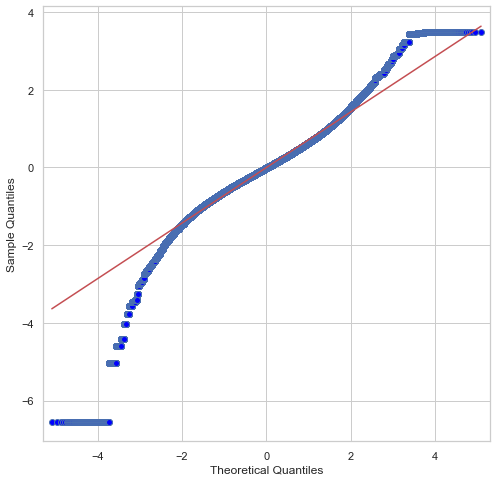

In [93]:
sm.qqplot(result3.resid, line='r');

In [94]:
M3 = ols(M3,data=data_anova).fit()
anova = sm.stats.anova_lm(M3, typ=1)
print(anova)



denominator = anova['sum_sq'].sum()
anova['proportion'] = anova['sum_sq'] / denominator

anova['proportion'] 

                       df        sum_sq       mean_sq             F  PR(>F)
income_mean_ln        1.0  7.328961e+06  7.328961e+06  1.402658e+07     0.0
gini_mean             1.0  1.127502e+05  1.127502e+05  2.157878e+05     0.0
Residual        5499997.0  2.873776e+06  5.225050e-01           NaN     NaN


income_mean_ln    0.710481
gini_mean         0.010930
Residual          0.278588
Name: proportion, dtype: float64

Based on above variance proportion, 
It turns out mean income(ln) explains 71% of variance.

* y= log child incomd x= log gdppp, gini_mean, parent income class

In [95]:
M4 = 'income_ln ~ income_mean_ln + gini_mean+parent_income_class'
result4 = smf.ols(M4, data = data_anova).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:              income_ln   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 6.219e+06
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:52:27   Log-Likelihood:            -5.4642e+06
No. Observations:             5500000   AIC:                         1.093e+07
Df Residuals:                 5499996   BIC:                         1.093e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0758    

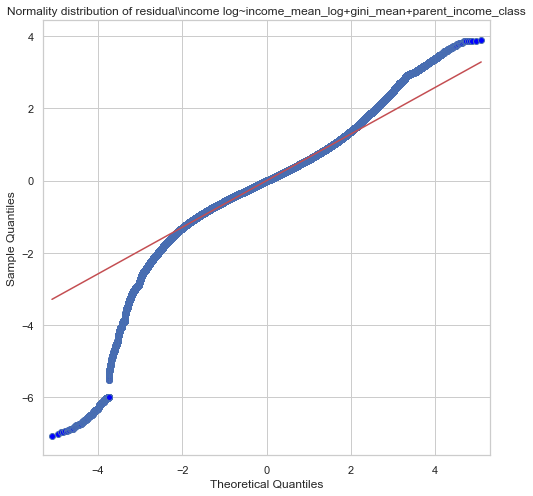

In [96]:
sm.qqplot(result4.resid, line='r')
plt.title('Normality distribution of residual\income log~income_mean_log+gini_mean+parent_income_class');

In [97]:
M4 = ols(M4,data=data_anova).fit()
anova = sm.stats.anova_lm(M4, typ=1)
print(anova)



denominator = anova['sum_sq'].sum()
anova['proportion'] = anova['sum_sq'] / denominator

anova['proportion'] 

                            df        sum_sq       mean_sq             F  \
income_mean_ln             1.0  7.328961e+06  7.328961e+06  1.716239e+07   
gini_mean                  1.0  1.127502e+05  1.127502e+05  2.640297e+05   
parent_income_class        1.0  5.250790e+05  5.250790e+05  1.229589e+06   
Residual             5499996.0  2.348697e+06  4.270361e-01           NaN   

                     PR(>F)  
income_mean_ln          0.0  
gini_mean               0.0  
parent_income_class     0.0  
Residual                NaN  


income_mean_ln         0.710481
gini_mean              0.010930
parent_income_class    0.050902
Residual               0.227686
Name: proportion, dtype: float64

Based on above variance proportion, 
It turns out mean income(ln) explains 71% of variance while parent income class explain around 0.05% 

* Here below we will run prediction to see if this model is suitable

In [98]:
y=np.log(data_anova["income_ln"])
X=pd.concat([np.log(data_anova["income_mean_ln"]),data_anova[["gini_mean","parent_income_class"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y)
model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.7538185855572392

In [99]:
model.coef_


#It is obvious that the average wage income of the country is the first determining factor
#it is logical that the gini has a negative sign
#it is surprising how little importance the class_income_parent has on 

array([ 1.02141195, -0.00237703,  0.00143612])

In [100]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)


df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.head(25)

-0.06651361642424858
[ 1.02141195 -0.00237703  0.00143612]


,Actual,Predicted
0,1.885597,1.840037
1,2.268250,2.301898
2,1.625571,1.796601
3,2.086413,1.985911
4,2.301011,2.231528
5,2.196153,2.106694
6,1.978586,2.006910
7,2.303741,2.260054
8,1.907087,1.904179
9,1.848058,1.823619


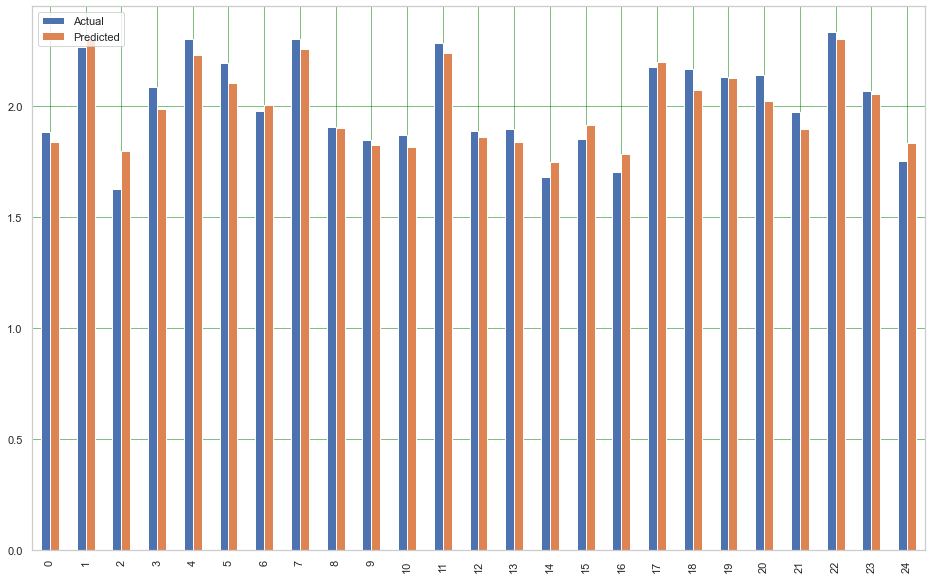

In [101]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 3.3 Summary of Models


R-squared (R2) measures the predictive quality of a linear regression:

it is the variance of the residuals
it can be called explained variance, total variance decomposition or coefficient of determination
it should ideally be close to 1
In the second table, we find the regression coefficient (coef) of the variable concerned:

the predicted value will be equal to the sum of all the explanatory values, multiplied by their respective variable coefficients
the objective of the regression will be to find the combination of coefficients explaining the maximum variance
P>[t] indicates the significance of this coefficient:

the higher the p-value, the less interesting the variable
it measures the significance of the coefficients of the variables (coef column)
Cond. No. measures the collinearity of the variables:

Having those in mind, we could answer questions below.



Q:

"Secondly, I would like you to use your models to verify some of the researcher’s facts. He claims that based on the regression coefficient associated with the Gini index, there are more people disadvantaged by living in a more unequal country than there are people who benefit. Also, it seems that by analyzing the total variance decomposition, 60% of the total variance is explained by the country alone (mean income and Gini index) and that 80% of the total variance is explained by the country and the parents’ income alone. That would mean that only the remaining 20% are due to other factors such as : effort, chance, etc."

A:


- We could say researcher facts are closely reflected through model. Looking at total variance in model M3, we could say 72% of variance is explained by country's mean income and Gini index.
-Also lookinng at model M4, 77% of variance is explained by country's mean income, Gini index and parent's income class.

So we could say approx 20% is indeed contritube child's income, such as effort, chance, etc






Choosing Model: we will chose model M4, 77% of variance is explained by country's mean income(log), Gini index and parent's income class.

Q:
"Finally, tell me if this model is worth using, and predict the income I’m supposed to have knowing that my parents earned approximately the mean income of the country."


    

A: In order to answer question above, we will run model M4 for country Belgium as below to see if this model is worth using.
We will assume that parent's income class is 50 and try to see child's income that is expected

In [102]:
BEL_data=data_anova.loc[(data_anova['country_code'] == 'BEL') & (data_anova['parent_income_class'] == 50)]


In [103]:
y=np.log(BEL_data["income_ln"])
X=pd.concat([np.log(BEL_data["income_mean_ln"]),BEL_data[["gini_mean","parent_income_class"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y)
model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)


-0.028753998534168268

In [104]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)


df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df.head(25)

0.9269422673850931
[0.58303407 0.         0.        ]


,Actual,Predicted
0,2.305004,2.246686
1,2.210435,2.246686
2,2.192850,2.246686
3,2.253043,2.246686
4,2.246576,2.246686
5,2.275373,2.246686
6,2.221997,2.246686
7,2.303079,2.246686
8,2.315401,2.246686
9,2.345206,2.246686


In [105]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04132207787645202
Mean Squared Error: 0.003003166570725362
Root Mean Squared Error: 0.05480115483021651


If we look at the result of metrics, root mean squared eror is 0.05 which is close to 0 and a lot lower than 0.5 , so we could say model is pretty worth to be used to predict individual's income based on given parent's income clasS(in thie case, country Belgium and parent's income class 50). Also mean suqared error is close to 0 which is good indication that model is worth using

Conclusion:
In the business context for bank, this model is usful to determine child's income based on country that they are living and parent's income class.
However as we could see before that model is pretty much relying on mean income of that country and parent's income class did not play as huge role as mean income of the country.
The reason is that, while collecting elasticity data, we had many NA values - so elasticity was not able to be collected to reflect various cases of the country. 
As a result, model pretty much reflected country that child was born, and not hugely reflected parent's income.

In order to see relevant of child's income and parent's income it will be better to secure complete data set for elatsicity.
Nevertheless, this model is worth using if we mainly want to see relevant between the children's income and the mean income of the country that that they were born.